# Baseline design of 2-D 6'' spectrometric FPU (single wafer, maximize pixel count)

C.Zhang

10/23/2022

## Constrains
### 1. Filter bank
Use SLIM baseline design: 
- 120-180 GHz, R=300 with oversampling of 1.6 -> 200 detectors per filter-bank. 
- 2 polarizations per spatial pixel. 
- **A single filter bank has a 6x33 mm2 footprint. Spacing between filter bank is assumed to be 3/4$\lambda$(150GHz) for now, which is 1.5 mm.** The 1/4 or 3/4  $\lambda$ spacing was for detectors along a feedline, but I'm using it for between filter banks.

### 2. Pixel
- So, for a typical pixel spacing of ~1.5 F\*Lambda, we have “optimal” values of 6 mm @ 95 GHz, 4 mm @ 150 GHz, 2.5 mm @ 250 GHz. However this doesn’t matter too much. (?)
- 10 mm horn diameter. 
- **Pixel-pixel gap is 1.5 mm for now.** (To be honest, I'm quite confused by the notes and Pete's slides. I'm afraid there may be some conflicts between the three points listed here. They may not make any sense...).

### 3. Total size
- Every thing on one 6-inch diameter wafer.
- Use 130 mm for pixel.
- Use 140 mm for spectrometers.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import * 

def gen_rotmatx_deg(theta=0):
    rad = np.radians(theta)
    c, s = np.cos(rad), np.sin(rad)
    RM = np.array(((c, -s), (s, c)))
    return RM

def addonepixel(ax,d=10,pos=np.array([0,0]),color='k',label=None):
    ax.add_patch(plt.Circle(pos, d/2., edgecolor=color, fill=False))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return pos
    
def addoneFB(ax,h=6,l=33,pos=np.array([0,0]),rot=0,color='k',label=None):
    #h,l = 6, 33
    X0 = np.array([[l/2.,h/2.],[-l/2.,h/2.],[-l/2.,-h/2.],[l/2.,-h/2.]])
    RM = gen_rotmatx_deg(theta=rot)
    X = np.dot(X0,RM)
    X[:,0] += pos[0]
    X[:,1] += pos[1]
    ax.add_patch(plt.Polygon(X, edgecolor=color, fill=False))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return X


## Design I: The most naive case: ring (18 pixels)
Similar to the single wafer design as in Pete's slides, place all FBs in an outer ring then pack the pixels around the center. Although here we are using a tighter constrain than in the slides, with a 140 mm maximum diameter instead of 6-inch. 

I squeezed in 36 filter banks for 18 pixels. The distance between closest corners of adjacent filters is ~0.5mm, a bit too small. There are large blank space between the out-most pixel and the inner edge of the filter. 

This is more of a validation of the code. 

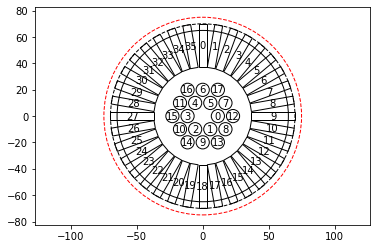

In [2]:
# draw the boundaries, specify element dimensions
# Everything in mm

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))
g=1.5
d=10
h,l = 6, 33

# initiate pixel and FB list

pixellist=[]
ipixel=0
FBlist=[]
iFB=0

# put FBs down first.

#rots=np.linspace(0,360,3,endpoint=False)
#pos0=np.array([0,pixellist[5][1]+d/2.+g+h/2.])
#for i in range(3):

N=36
rots=np.linspace(0,360,N,endpoint=False)
pos0=np.array([0,140/2.-l/2.])
for i in range(N):
    RM=gen_rotmatx_deg(rots[i])
    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90,label='%d'%iFB))
    iFB += 1

# put pixels down 

rots=np.linspace(0,360,6,endpoint=False)
pos0=np.array([d+g,0]) # 
for i in range(6):
    RM=gen_rotmatx_deg(rots[i])
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label='%d'%ipixel))
    ipixel += 1
rots=np.linspace(0,360,6,endpoint=False)
pos0=np.array([0,pixellist[5][1]+(d+g)*sqrt(3)/2]) # 
for i in range(6):
    RM=gen_rotmatx_deg(rots[i])
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label='%d'%ipixel))
    ipixel += 1
rots=np.linspace(0,360,6,endpoint=False)
pos0=np.array([2*d+2*g,0]) # 
for i in range(6):
    RM=gen_rotmatx_deg(rots[i])
    if ipixel >= N/2.:
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color='r',label='%d'%ipixel))
    else:
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label='%d'%ipixel))
    ipixel += 1

# add center pixels and spectrometers

#pixellist.append(addonepixel(ax,d,color='r',label='%d'%ipixel))#
#ipixel += 1

#Use adjustable='box-forced' to make the plot area square-shaped as well.

ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()

## Design II: 

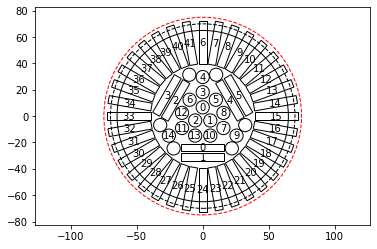

In [3]:
# draw the boundaries, specify element dimensions
# Everything in mm

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))
g=1.5
d=10
h,l = 6, 33

# initiate pixel and FB list

pixellist=[]
ipixel=0
FBlist=[]
iFB=0

# put pixels down 

## Pixel: center three

rots=np.linspace(0,360,3,endpoint=False)
pos0=np.array([0,(d+g)/sqrt(3)]) # 
for i in range(3):
    RM=gen_rotmatx_deg(rots[i])
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label='%d'%ipixel))
    ipixel += 1
    
## Pixel: partial hex pattern around pos0, for full hex pattern see record

pos0=np.array([0,(d+g)/sqrt(3)+d+g])
pos0b=np.array([0,d+g]) # 
rots=np.linspace(0,360,3,endpoint=False)
rotsb=np.linspace(0,360,6,endpoint=False)
for i in range(3):
    RM=gen_rotmatx_deg(rots[i])
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label='%d'%ipixel))
    ipixel += 1
    for j in [0,2,4]:
        RMb=gen_rotmatx_deg(rotsb[j])
        pixellist.append(addonepixel(ax,d,np.dot(pos0b,RMb)+np.dot(pos0,RM),label='%d'%ipixel))
        ipixel += 1


        
# put FBs down 

## FB: tri-radial

rots=np.linspace(0,360,3,endpoint=False)
pos0=np.array([0,pixellist[1][1]-(d/2.+g+h/2.+11)])
for i in range(3):
    RM=gen_rotmatx_deg(rots[i])
    for j in range(2):
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0-np.array([0,j*g+j*h]),RM),rot=rots[i],label='%d'%iFB))
        iFB += 1
        
## FB: ring pattern

N=36
rots=np.linspace(0,360,N,endpoint=False)
pos0=np.array([0,145/2.-l/2.])
for i in range(N):
    RM=gen_rotmatx_deg(rots[i])
    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90,label='%d'%iFB))
    iFB += 1

pos0=np.array([0,min(FBlist[6][:,1])-g-d/2.])
rots=np.linspace(0,360,3,endpoint=False)
rot0=18
for i in range(3):
    RMp=gen_rotmatx_deg(rots[i]+rot0)
    RMm=gen_rotmatx_deg(rots[i]-rot0)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RMp),label=''))#label='%d'%ipixel))
    ipixel += 1
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RMm),label=''))#label='%d'%ipixel))
    ipixel += 1
    
#Use adjustable='box-forced' to make the plot area square-shaped as well.

ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
#ax.set_xlim(-30,-10)
#ax.set_ylim(20,40)
plt.show()

## Efficiency
We define a plenary efficiency putting FBs and gaps into consideration

$$\eta = N_{pix}(A'_{pix}+2A'_{FB})/A_{tot} = N_{pix}(\pi(d+g)^2/4+2(h+g)(l+g))/(\pi D^2/4).$$

And a optical efficiency, which only considers the area of horns

$$\eta_{o} = N_{pix}A_{pix}/A_{tot} = N_{pix}(d/D)^2.$$

In [4]:
D0=130.
D1=140.

# What the absolute maximum? eta=1
Nmax = (np.pi*D1**2/4) / ((np.pi*(d+g)**2)/4 + 2*(h+g)*(l+g))
etao = int(Nmax)*((np.pi*(d)**2)/4) / (np.pi*D0**2/4)
print('Maximum Npix if eta=1: %d, etao= %.2f'%(int(Nmax),etao))

# What's the Design I/II efficiency?
etaI  = 18*((np.pi*(d+g)**2)/4 + 2*(h+g)*(l+g)) / (np.pi*D1**2/4)
etaoI = 18*((np.pi*(d)**2)/4) / (np.pi*D0**2/4)
print('Design I: eta=%.2f, etao=%.2f '%(etaI,etaoI))
etaII = 21*((np.pi*(d+g)**2)/4 + 2*(h+g)*(l+g)) / (np.pi*D1**2/4)
etaoII= 21*(d/D0)**2
print('Design II: eta=%.2f, etao=%.2f '%(etaII,etaoII))

Maximum Npix if eta=1: 24, etao= 0.14
Design I: eta=0.73, etao=0.11 
Design II: eta=0.85, etao=0.12 


## Design IIIx: hex shape pixels close packing

Efficiencies of design I and II are not yet the theoretical optimal. I'm not sure if the theoretical optimal is feasible or not, probably not. I think the closest we can get is to re-design the pixel itself. Keep the optical sensitive part the same as before, a 10 mm (+$g$) diameter circle, and have the $2\times$FB filling a hex area around the optical pixel. The length of the hex edge is $L$,

$$A_{hex} = 3\sqrt{3}L^2/2$$

We want 

$$A_{hex} = A'_{pix} + 2A'_{FB},$$

which gives $L=15.5$ mm. 

In the cell below I tried to layout the hex design. Black pixels with numbers are with centers inside the 130 mm range, red ones are with centers inside 140 mm range. We get **21** pixels inside 130 mm in this layout. If we think 1,5,4,9,19,20 are fine at where they are, and redesign 0,14,18 to use the adjacent red area and fit in 2$\times$ pixels, we can reach the maximum 24 pixels in this layout. 

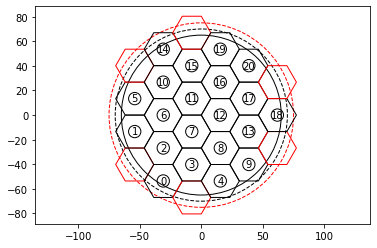

Design III:  eta=0.85, etao=0.12 
Same as Design II


In [5]:
# draw the boundaries, specify element dimensions
# Everything in mm

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='k', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='k', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 150/2., edgecolor='r', linestyle='--', fill=False))
g=1.5
d=10
h,l = 6, 33
L = (((np.pi*(d+g)**2)/4 + 2*(h+g)*(l+g)) *2/(3*sqrt(3)))**0.5

def addoneHex(ax,L,pos=np.array([0,0]),rot=0,color='k',label=None):
    X0 = np.array([[L,0],[L/2.,sqrt(3)*L/2.],[-L/2.,sqrt(3)*L/2.],[-L,0],[-L/2.,-sqrt(3)*L/2.],[L/2.,-sqrt(3)*L/2.]])
    RM = gen_rotmatx_deg(theta=rot)
    X = np.dot(X0,RM)
    X[:,0] += pos[0]
    X[:,1] += pos[1]
    ax.add_patch(plt.Polygon(X, edgecolor=color, fill=False))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return X


# initiate pixel and FB list

pixellist=[]
ipixel=0
FBlist=[]
iFB=0

# close packing the hex pixels

a = np.array([3.*L/2., sqrt(3)*L/2.])
b = np.array([3.*L/2., -sqrt(3)*L/2.])

xp = [ 0,-1,-2,-3, 1, 0,-1,-2,-3, 2, 1, 0,-1,-2,-3, 2, 1, 0,-1,-2, 2, 1, 0,-1, 2, 1, 0]
yp = [-3,-2,-1, 0,-3,-2,-1, 0, 1,-3,-2,-1, 0, 1, 2,-2,-1, 0, 1, 2,-1, 0, 1, 2, 0, 1, 2]

#for i in range(-3,4):
#    for j in range(-3,4):
#        pos0 = i*a+j*b+np.array([L, 0])
#        addoneHex(ax,L,pos=pos0,rot=0,color='r',label='%d,%d'%(i,j))
#        #ipixel += 1

for i in range(-3,4):
    for j in range(-3,4):
        pos0 = i*a+j*b+np.array([L, 0])
        if pos0[0]**2+pos0[1]**2>=(140/2.)**2:
            continue 
        elif pos0[0]**2+pos0[1]**2>=(130/2.)**2:
            addoneHex(ax,L,pos=pos0,rot=0,color='r',label='')
        else:
            pixellist.append(addonepixel(ax,d,pos=pos0,color='k',label=''))
            addoneHex(ax,L,pos=pos0,rot=0,color='k',label='%d'%ipixel)
            ipixel += 1
    


#Use adjustable='box-forced' to make the plot area square-shaped as well.

ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()

# What's the Design III efficiency?
eta  = len(pixellist)*((np.pi*(d+g)**2)/4 + 2*(h+g)*(l+g)) / (np.pi*D1**2/4)
etao = len(pixellist)*((np.pi*(d)**2)/4) / (np.pi*D0**2/4)
print('Design III:  eta=%.2f, etao=%.2f '%(eta,etao))
print('Same as Design II')

## Conclusion
We explored 2-D 6-inch FPU layout. The theoretical maximum is 24 pixels. We may be able to achieve it with some major redesign of our detectors and filterbanks. With the current detector design, the best we can do is about 21 pixels. The previous single wafer design has 18 pixels. 21/24 designs give some but limited improvement.

I'll use the 24-pixel design as the baseline.

In [6]:
# for record

#########################################
# Make hex pattern (7 pixels) around pos0

#pos0=np.array([0,(d+2*g+l)/sqrt(3)+d+g]) # 
#pos0b=np.array([0,d+g]) # 
#rots=np.linspace(0,360,3,endpoint=False)
#rotsb=np.linspace(0,360,6,endpoint=False)
#for i in range(3):
#    RM=gen_rotmatx_deg(rots[i])
#    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label='%d'%ipixel))
#    ipixel += 1
#    for j in range(6):
#        RMb=gen_rotmatx_deg(rotsb[j])
#        pixellist.append(addonepixel(ax,d,np.dot(pos0b,RMb)+np.dot(pos0,RM),label='%d'%ipixel))
#        ipixel += 1

#########################################
# Put FB around

# tangentially
#rots=np.linspace(0,360,3,endpoint=False)+360/6.
#pos0=np.array([0,pixellist[1][1]-(d/2.+g+h/2.+8*g+7*h)])
#for i in range(3):
#    RM=gen_rotmatx_deg(rots[i])
#    for j in range(2):
#        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0+np.array([0,j*g+j*h]),RM),rot=rots[i],label='%d'%iFB))
#        iFB += 1
    #FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],label='%d'%iFB))
    #iFB += 1

# radial
#rots=np.linspace(0,360,3,endpoint=False)
#pos0=np.array([max(FBlist[0][:,0])+g+h/2.,pixellist[21][1]-d/2.-g-l/2.])
#for i in range(3):
#    RM=gen_rotmatx_deg(rots[i])
#    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90,label='%d'%iFB))
#    iFB += 1
    